In [1]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np

In [2]:
# Data import
#df=pd.read_csv('/Users/jeanlahellec/Library/Mobile Documents/com~apple~CloudDocs/Master ESSEC/headlines_english_arabic_countries.csv')
df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')

/var/folders/4q/7w99lfvx0cl74dtmhv3y6gfc0000gn/T/ipykernel_38278/831142771.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')


In [3]:
df.head()

,gkgrecordid,date,subsourcecommonname,documentidentifier,enhancedthemes,enhancedlocations,tone,extrasxml,translationinfo
0,20151011213000-456,2.015101e+13,dailynewsegypt.com,http://www.dailynewsegypt.com/2015/10/11/tgm-m...,"ECON_WORLDCURRENCIES_DOLLAR,2612;ECON_WORLDCUR...","4#Milan, Lombardia, Italy#IT#IT09#18363#45.466...","1.76991150442478,2.54424778761062,0.7743362831...",NaN,NaN
1,20151011213000-1551,2.015101e+13,gizmodo.com.au,http://www.gizmodo.com.au/2015/10/5-ideas-that...,"MANMADE_DISASTER_IMPLIED,58;MANMADE_DISASTER_I...","3#Manhattan, New York, United States#US#USNY#N...","0.843320017754106,2.13049267643142,1.287172658...",NaN,NaN
2,20151011213000-1644,2.015101e+13,competitor.com,http://velonews.competitor.com/2015/10/news/ch...,"WB_2670_JOBS,696;WB_2815_SKILLS_AND_EDUCATION,...","4#Abu Dhabi, Abu ZÂ¸Aby, United Arab Emirates#...","4.83271375464684,4.83271375464684,0,4.83271375...",NaN,NaN
3,20151016043000-1997,2.015102e+13,daily-chronicle.com,http://www.daily-chronicle.com/2015/10/15/saud...,"GENERAL_GOVERNMENT,620;GENERAL_GOVERNMENT,4524...","4#Baghdad, Baghdad, Iraq#IZ#IZ07#36785#33.3386...","-4.35754189944134,1.11731843575419,5.474860335...",NaN,NaN
4,20151011150000-503,2.015101e+13,dailynewsegypt.com,http://www.dailynewsegypt.com/2015/10/11/sharp...,"KIDNAP,2150;EXTREMISM,2184;BORDER,2772;TAX_REL...","4#Gaza, Israel (General), Israel#IS#IS00#18315...","-9.05730129390018,0.924214417744917,9.98151571...",NaN,NaN


In [4]:
# Transforming the tone column into a list
def convert_into_list(string):
    listos = list(string.split(","))
    listos = [eval(i) for i in listos] # to get a float list
    return listos

df.tone = df.tone.apply(lambda x: convert_into_list(x))

In [5]:
# Checking the tone transformation
print(df.tone[0])
print(df.tone[0][0]+df.tone[0][1])

[1.76991150442478, 2.54424778761062, 0.774336283185841, 3.31858407079646, 18.9159292035398, 1.43805309734513, 849]
4.3141592920354


In [6]:
# Creating tone columns
df['mean_tone'] = df.tone.apply(lambda x: x[0])
df['pos_tone'] = df.tone.apply(lambda x: x[1])
df['neg_tone'] = df.tone.apply(lambda x: x[2])
df['binary_tone'] = df.tone.apply(lambda x: 1 if x[1] > x[2] else 0) # 1 if pos_tone > neg_tone otherwise 0

In [7]:
print(df.binary_tone.head())

0    1
1    1
2    1
3    0
4    0
Name: binary_tone, dtype: int64


In [8]:
# Check type date
print(df.date.iloc[0],type(df.date.iloc[0]))

20151011213000.0 <class 'numpy.float64'>


In [9]:
# Date conversion
df.date = df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
df.date

0        2015-10-11 21:30:00
1        2015-10-11 21:30:00
2        2015-10-11 21:30:00
3        2015-10-16 04:30:00
4        2015-10-11 15:00:00
                 ...        
773841   2023-03-07 13:45:00
773842   2023-03-07 19:15:00
773843   2023-03-07 19:15:00
773844   2023-03-07 19:15:00
773845   2023-03-07 19:15:00
Name: date, Length: 773846, dtype: datetime64[ns]

In [10]:
# Check enhanced themes format
df.enhancedthemes.iloc[0]

'ECON_WORLDCURRENCIES_DOLLAR,2612;ECON_WORLDCURRENCIES_US_DOLLAR,2612;TAX_FNCACT_TENANTS,2567;TAX_FNCACT_TENANTS,2667;AFFECT,2532;NEGOTIATIONS,1137;NEGOTIATIONS,2805;NEGOTIATIONS,4173;WB_840_JUSTICE,1137;WB_840_JUSTICE,2805;WB_840_JUSTICE,4173;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,1137;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,2805;WB_2473_DIPLOMACY_AND_NEGOTIATIONS,4173;WB_939_NEGOTIATION,1137;WB_939_NEGOTIATION,2805;WB_939_NEGOTIATION,4173;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,1137;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,2805;WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT,4173;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,1137;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,2805;WB_936_ALTERNATIVE_DISPUTE_RESOLUTION,4173;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,1137;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,2805;WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE,4173;WB_843_DISPUTE_RESOLUTION,1137;WB_843_DISPUTE_RESOLUTION,2805;WB_843_DISPUTE_RESOLUTION,4173;WB_2471_PEACEKEEPING,1137;WB_2471_PEACEKEEPIN

In [11]:
#  Cleaning of the headlines
def headlines_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.split(',')[0] for elem in s_.split(';')] # delete the number after the coma

    final_str=[]
    separator=' '
    for s in modified_str:
        if s.split('_')[0]=='WB':
            final_str.append(separator.join(s.split('_')[2:]).split(' ')) # delete the prefix 'WB_XXX', remove underscore and split each word
        else:
            final_str.append(separator.join(s.split('_')).split(' '))

    # to get a list of words and not a list of sub lists
    merged_list = []
    for sublist in final_str:
        merged_list.extend(sublist)

    return(merged_list) 

In [12]:
# Test of cleaning
original_str = 'WB_843_DISPUTE_RESOLUTION,1137;WB_843_DISPUTE_RESOLUTION,2805;TEST_TESTOS,2021'
res = headlines_cleaning(original_str)
print(res, res[0])

['DISPUTE', 'RESOLUTION', 'DISPUTE', 'RESOLUTION', 'TEST', 'TESTOS'] DISPUTE


In [13]:
df.enhancedthemes.apply(lambda x: headlines_cleaning(x))

0         [ECON, WORLDCURRENCIES, DOLLAR, ECON, WORLDCUR...
1         [MANMADE, DISASTER, IMPLIED, MANMADE, DISASTER...
2         [JOBS, SKILLS, AND, EDUCATION, JOBS, STRATEGIE...
3         [GENERAL, GOVERNMENT, GENERAL, GOVERNMENT, TAX...
4         [KIDNAP, EXTREMISM, BORDER, TAX, RELIGION, MUS...
                                ...                        
773841    [GENERAL, GOVERNMENT, GENERAL, GOVERNMENT, EPU...
773842    [GENERAL, HEALTH, MEDICAL, TAX, FNCACT, VICE, ...
773843                                                [nan]
773844    [GENERAL, GOVERNMENT, EPU, POLICY, GOVERNMENT,...
773845    [PROTEST, EPU, CATS, NATIONAL, SECURITY, TAX, ...
Name: enhancedthemes, Length: 773846, dtype: object

In [14]:
# Checking null values
null_counts = df.isnull().sum()
print(null_counts)
# Drop empty headlines/sources
df = df.dropna(subset=['enhancedthemes'])
df = df.dropna(subset=['subsourcecommonname'])

gkgrecordid                 0
date                        0
subsourcecommonname       103
documentidentifier          0
enhancedthemes          80673
enhancedlocations           0
tone                        0
extrasxml              221985
translationinfo        773846
mean_tone                   0
pos_tone                    0
neg_tone                    0
binary_tone                 0
dtype: int64


In [15]:
# Definition of the theme filter keywords 
def filtering_themes(dataframe,theme):

    if theme == 'CONSUMPTION':
        filter = ['CONSUMPTION','CONSUME','CONSUMER','PURCHASE','PURCHASING','PURCHASER','BUYER']
        themes_filtered_df = dataframe[dataframe['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

    elif theme == 'TRADE':
        filter = ['TRADE','MARKET']
        themes_filtered_df = dataframe[dataframe['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]

    elif theme == 'EMPLOYMENT':
        filter = ['EMPLOYMENT','UNEMPLOYMENT']
        themes_filtered_df = dataframe[dataframe['enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))]
    
    else:
        print('Theme is not recognised, please select between: "CONSUMPTION", "TRADE", "EMPLOYMENT".')

    return(themes_filtered_df)

In [16]:
filtered_df = filtering_themes(df,'CONSUMPTION')

In [17]:
# Count the filtered number of articles per year
nb_articles= filtered_df.groupby(filtered_df.date.dt.year)['enhancedthemes'].count()
print(nb_articles)

date
2015     626
2016    1013
2017     826
2018     772
2019     629
2020     411
2021     335
2022     374
2023      54
Name: enhancedthemes, dtype: int64


In [18]:
# Average of the tone of articles per year
avg_tone = filtered_df.groupby(filtered_df.date.dt.year)['mean_tone'].mean()
print(avg_tone)

date
2015   -0.926018
2016   -0.834495
2017   -0.524444
2018   -0.938773
2019   -1.380526
2020   -1.150442
2021    0.123048
2022   -0.526010
2023    0.144758
Name: mean_tone, dtype: float64


In [19]:
# Ratio of pos and neg tone of articles per year
ratio_tone = filtered_df.groupby(filtered_df.date.dt.year)['binary_tone'].mean()
print(ratio_tone)

date
2015    0.325879
2016    0.371175
2017    0.397094
2018    0.321244
2019    0.302067
2020    0.282238
2021    0.486567
2022    0.382353
2023    0.444444
Name: binary_tone, dtype: float64


Text(0.5, 1.0, 'test')

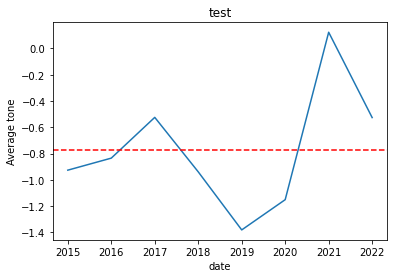

In [37]:
import matplotlib.pyplot as plt
# plot the data
plt.plot(avg_tone.loc[:2022])
plt.axhline(avg_tone.loc[:2022].mean(), color='red', linestyle='--', label='Average')

# set axis labels and title
plt.xlabel('date')
plt.ylabel('Average tone')
plt.title('test')

In [ ]:
# plot the data
plt.plot(ratio_tone.loc[:2022])
plt.axhline(ratio_tone.loc[:2022].mean(), color='red', linestyle='--', label='Average')

# set axis labels and title
plt.xlabel('date')
plt.ylabel('Tone ratio')
plt.title('test')

In [20]:
import re

def location_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.split('#') for elem in re.split(';|, ', s_)]  # delete the hastags and semicolomm, llist of lists
    merged_list = [item for sublist in modified_str for item in sublist]  # merge sublists
    final_list=[s for s in merged_list if s.isalpha()] # remove duplicates and non-alphanumeric elements
    return final_list

In [21]:
location_cleaning(df.enhancedlocations[0])

['Milan',
 'Lombardia',
 'Italy',
 'IT',
 'Cairo',
 'Egypt',
 'EG',
 'Cairo',
 'Egypt',
 'EG',
 'Alexandria',
 'Egypt',
 'EG',
 'Alexandria',
 'Egypt',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Paris',
 'France',
 'FR',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Dubai',
 'Dubayy',
 'AE']

In [22]:
df['enhancedlocations']=df.enhancedlocations.apply(lambda x: location_cleaning(x))

In [28]:
df['enhancedlocations'].head(5)

0    [Milan, Lombardia, Italy, IT, Cairo, Egypt, EG...
1    [Manhattan, US, USNY, Manhattan, US, USNY, UK,...
2                                                 [AE]
3    [Baghdad, Baghdad, Iraq, IZ, Baghdad, Baghdad,...
4    [Gaza, Israel, IS, Gaza, Israel, IS, Cairo, Eg...
Name: enhancedlocations, dtype: object

In [29]:
filtered_df['enhancedlocations']=df['enhancedlocations']

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_88667/2904860164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['enhancedlocations']=df['enhancedlocations']


In [57]:
filtered_df['enhancedlocations'][0]

['Milan',
 'Lombardia',
 'Italy',
 'IT',
 'Cairo',
 'Egypt',
 'EG',
 'Cairo',
 'Egypt',
 'EG',
 'Alexandria',
 'Egypt',
 'EG',
 'Alexandria',
 'Egypt',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Egypt',
 'EG',
 'EG',
 'EG',
 'Paris',
 'France',
 'FR',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Egyptian',
 'EG',
 'EG',
 'EG',
 'Dubai',
 'Dubayy',
 'AE']

In [51]:
filtered_df['enhancedlocations'][2]

KeyError: 2

In [48]:
# Definition of the filter keywords 
#country_filter = ['Egypt','Cairo','Alexandria']
theme_filter = ['Egypt','EG', 'Cairo', 'Alexandria', 'Egyptian']

def filtered(liste, filter):
    filtered_words=[elem for elem in liste if elem in theme_filter ]
    ratio= len(filtered_words)/len(liste)
    return(ratio)
# Filtering by theme

filtered(df['enhancedlocations'][8], theme_filter)

0.0

In [49]:
filtered_df['enhanced_ratio'] = filtered_df.enhancedlocations.apply(lambda x: filtered(x, theme_filter))
# Filtering by country
#filtered_df = filtered_df[filtered_df[''].apply(lambda x: any(keyword in x for keyword in country_filter)) or filtered_df[''].apply(lambda x: any(keyword in x for keyword in country_filter))]
filtered_df.head(5)

/var/folders/7_/m8tf5s7d4bz_k2fcgvs7r_wr0000gn/T/ipykernel_88667/1781459543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['enhanced_ratio'] = filtered_df.enhancedlocations.apply(lambda x: filtered(x, theme_filter))


,gkgrecordid,date,subsourcecommonname,documentidentifier,enhancedthemes,enhancedlocations,tone,extrasxml,translationinfo,mean_tone,enhanced_ratio
0,20151011213000-456,2015-10-11 21:30:00,dailynewsegypt.com,http://www.dailynewsegypt.com/2015/10/11/tgm-m...,"ECON_WORLDCURRENCIES_DOLLAR,2612;ECON_WORLDCUR...","[Milan, Lombardia, Italy, IT, Cairo, Egypt, EG...","[1.76991150442478, 2.54424778761062, 0.7743362...",NaN,NaN,4.793510,0.878049
5,20151011150000-539,2015-10-11 15:00:00,yahoo.com,https://en-maktoob.news.yahoo.com/mideast-stoc...,"ECON_OILPRICE,114;ECON_STOCKMARKET,52;ECON_STO...","[Dubayy, AE, Qatar, QA, QA, QA, Qatar, QA, QA,...","[0.465116279069767, 0.930232558139535, 0.46511...",NaN,NaN,3.720930,0.000000
8,20151017084500-1217,2015-10-17 08:45:00,barossaherald.com.au,http://www.barossaherald.com.au/story/3429242/...,"TAX_FNCACT_BACKBENCHER,2073;AGRICULTURE,907;AG...","[Indonesian, ID, ID, ID, Australian, AS, AS, A...","[-4.93506493506493, 2.07792207792208, 7.012987...",NaN,NaN,5.238095,0.000000
15,20151017104500-1406,2015-10-17 10:45:00,cachevalleydaily.com,http://www.cachevalleydaily.com/news/national/...,"TAX_FNCACT_CANDIDATES,163;TAX_FNCACT_CANDIDATE...","[Alexandria, Egypt, EG, Alexandria, Egypt, EG,...","[0.453857791225415, 5.29500756429652, 4.841149...",NaN,NaN,6.707010,0.995745
31,20151018111500-724,2015-10-18 11:15:00,dubaicityguide.com,http://www.dubaicityguide.com/site/news/news-d...,"SOC_EMERGINGTECH,1781;WB_1467_EDUCATION_FOR_AL...","[Dubai, Dubayy, AE]","[3.93873085339168, 4.37636761487965, 0.4376367...",NaN,NaN,6.856309,0.000000
